# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("previsao_de_renda.csv")
df


,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
df.drop(columns=["Unnamed: 0", "index"], inplace=True)

In [5]:
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [7]:
df["tempo_emprego"] = df["tempo_emprego"].fillna(df["tempo_emprego"].median())

In [9]:
# Seleção das variáveis numéricas
df_num = df.select_dtypes(include=["int64", "float64"])

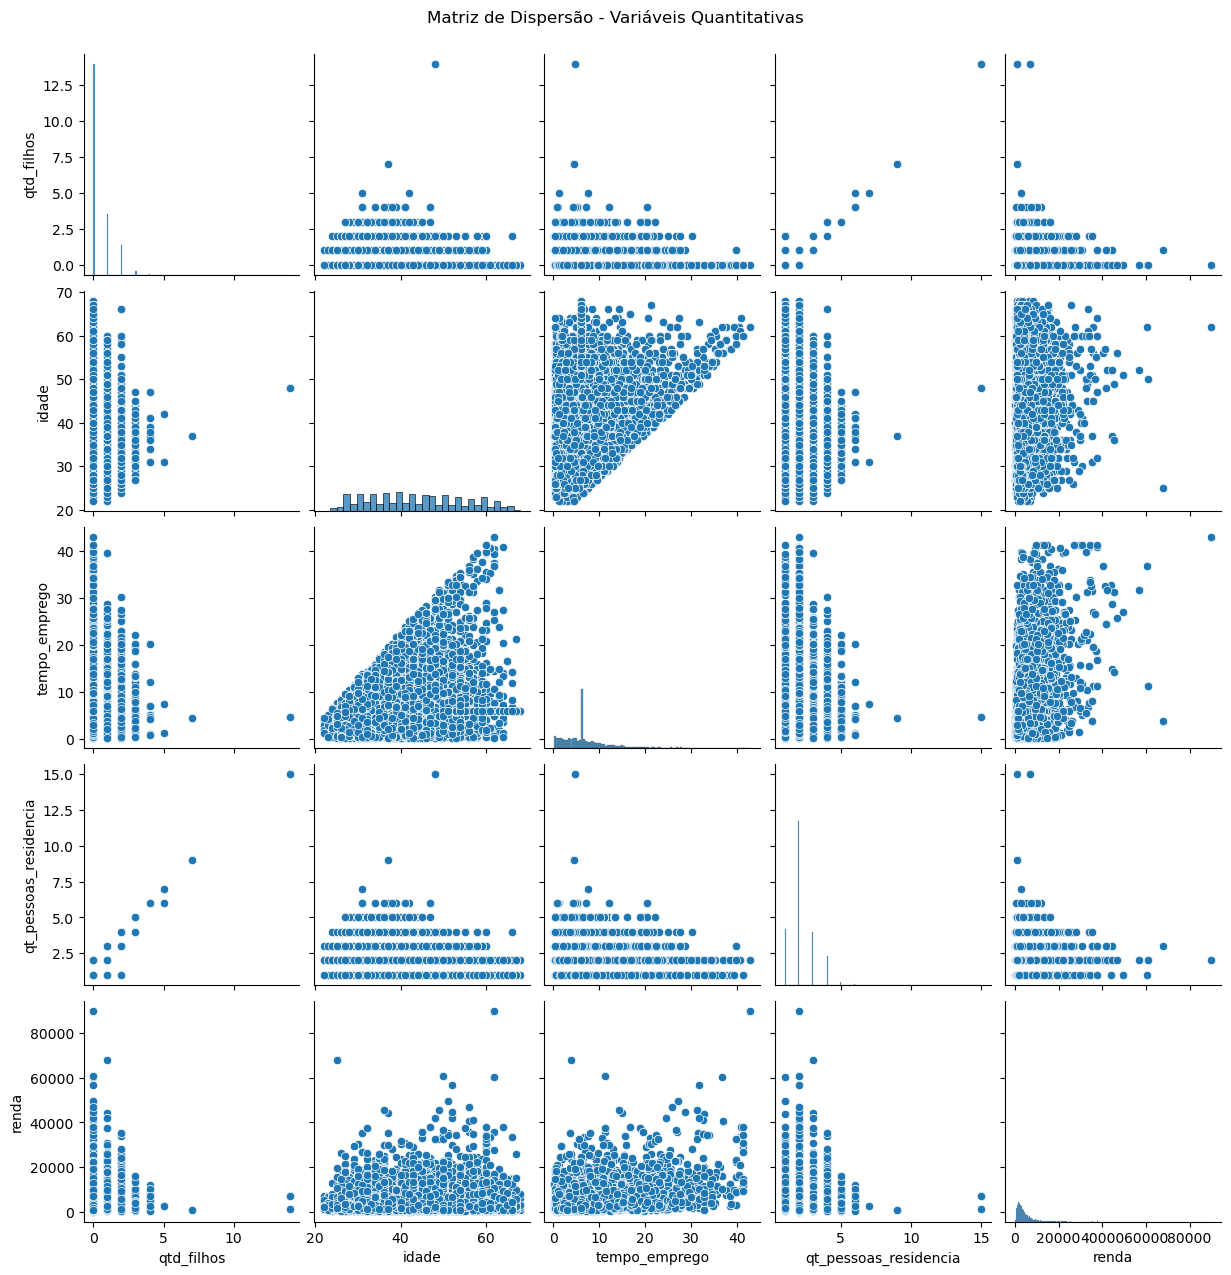

In [12]:
# Matriz de dispersão
sns.pairplot(df_num)
plt.suptitle("Matriz de Dispersão - Variáveis Quantitativas", y=1.02)
plt.show()

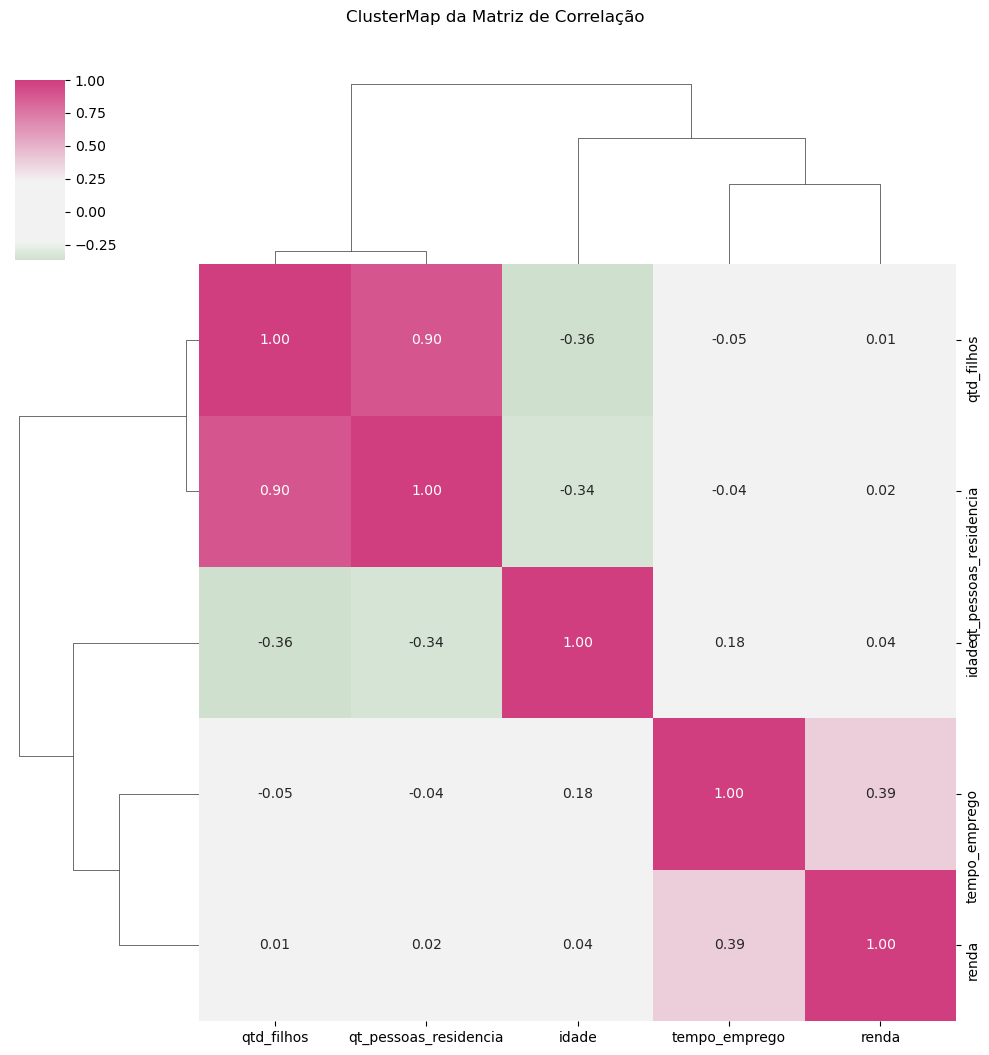

In [24]:
# Matriz de correlação com agrupamento
cmap = sns.diverging_palette(h_neg=125, h_pos=350, sep=60, center="light", as_cmap=True)
sns.clustermap(df_num.corr(), figsize=(10, 10), center=0, cmap=cmap, annot=True, fmt=".2f")
plt.suptitle("ClusterMap da Matriz de Correlação", y=1.05)
plt.show()

Foi possível observar que as variáveis tempo_emprego e idade são as mais correlacionadas com a renda. 
Outras variáveis, como qtd_filhos e qt_pessoas_residencia, apresentaram correlação fraca ou inexistente com a renda. 


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [26]:
df_num.corr()['renda'].sort_values(ascending=False)

renda                    1.000000
tempo_emprego            0.387606
idade                    0.042570
qt_pessoas_residencia    0.020977
qtd_filhos               0.009567
Name: renda, dtype: float64

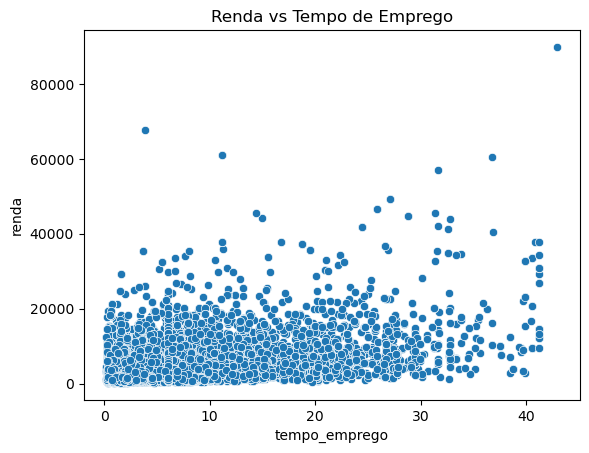

In [28]:
# Scatterplot 1 - tempo_emprego vs renda
sns.scatterplot(data=df, x='tempo_emprego', y='renda')
plt.title("Renda vs Tempo de Emprego")
plt.show()

 A relação visual com `tempo_emprego` mostrou uma leve tendência de crescimento da renda conforme o tempo de emprego aumenta.

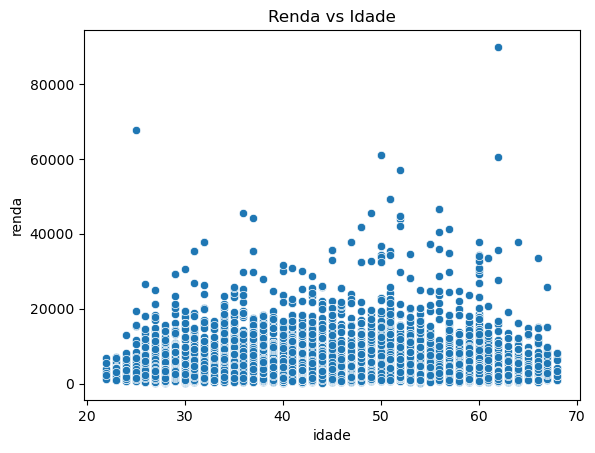

In [30]:
# Scatterplot 2 - idade vs renda
sns.scatterplot(data=df, x='idade', y='renda')
plt.title("Renda vs Idade")
plt.show()

Não houve uma tendência tão clara, mas foi possível notar uma certa concentração de renda nas faixas centrais da idade, com maior variabilidade. 


3) Na su aopinião, há outliers na variável renda?

Na minha opinião, sim, parece haver outliers na variável renda. Observando os gráficos de dispersão gerados, percebi que a maioria das pessoas tem rendas mais concentradas nas faixas abaixo de R$ 10.000. Mas também reparei que existem alguns pontos bem distantes dos demais, com valores muito mais altos, que se destacam bastante visualmente.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [32]:
df_log = df.copy()
df_log['renda_log'] = np.log(df_log['renda'])

In [34]:
df_log['renda_log'] = np.log(df_log['renda'])

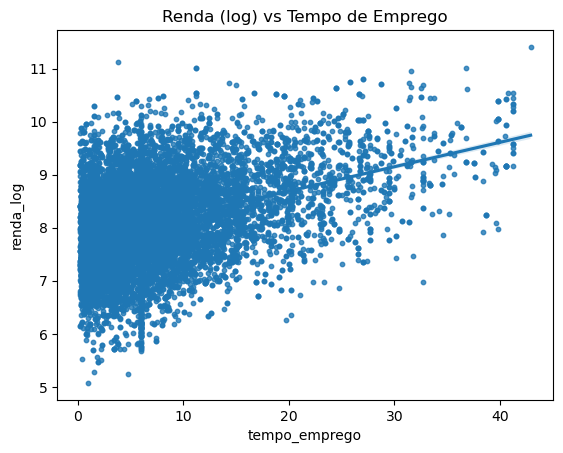

In [36]:
# Gráfico: renda_log vs tempo_emprego
sns.regplot(x='tempo_emprego', y='renda_log', data=df_log, scatter_kws={'s': 10})
plt.title("Renda (log) vs Tempo de Emprego")
plt.show()

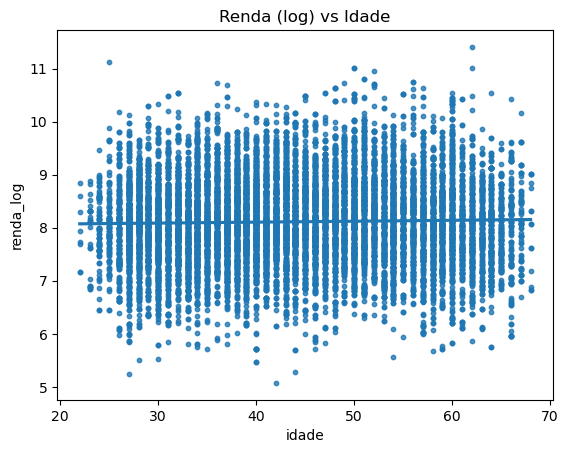

In [38]:
# Gráfico: renda_log vs idade
sns.regplot(x='idade', y='renda_log', data=df_log, scatter_kws={'s': 10})
plt.title("Renda (log) vs Idade")
plt.show()

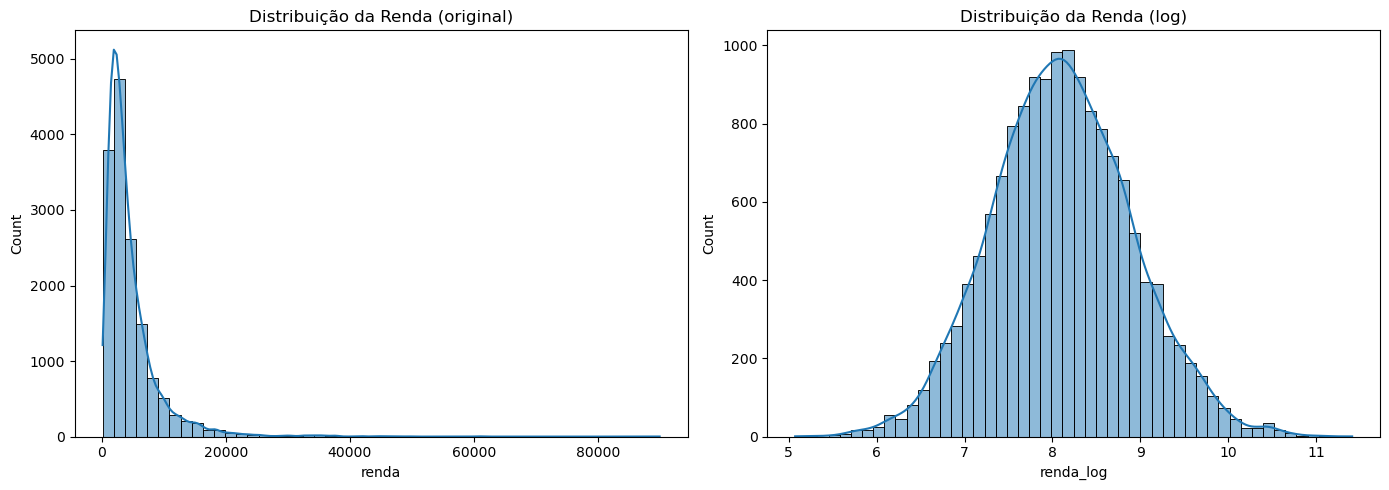

In [40]:
# Histogramas para comparar a distribuição da renda antes e depois do log

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma da renda original
sns.histplot(df['renda'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribuição da Renda (original)')
axes[0].set_xlabel('renda')

# Histograma da renda após log
sns.histplot(df_log['renda_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribuição da Renda (log)')
axes[1].set_xlabel('renda_log')

plt.tight_layout()
plt.show()


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Na minha opinião, a aplicação do log na variável renda melhorou a análise. 
Antes da transformação, os gráficos mostravam muitos pontos agrupados nas faixas mais baixas e alguns valores muito altos que se destacavam bastante — o que dificultava perceber padrões ou tendências nos dados.

Com a aplicação do log, a distribuição ficou mais suave e equilibrada, e a visualização dos gráficos de dispersão ficou mais clara. A relação entre tempo_emprego e renda_log, por exemplo, apareceu de forma mais evidente, com uma linha de tendência mais definida no gráfico.

Além disso, os outliers deixaram de “puxar” tanto os gráficos, o que facilitou identificar a forma como as variáveis realmente se relacionam com a renda na maior parte dos casos. 

Por isso, acredito que o log ajudou a deixar a análise mais fácil de interpretar e com menos distorção visual.